<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
%matplotlib inline

In [53]:
import pandas as pd
datos= pd.read_csv("EnergyMolecule/roboBohr.csv")
datos.shape
datos.info()
datos.describe()
#print(datos)
...
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.


In [6]:
#Ajuste Training Set
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
#Ajuste Validation Set
scaler2 = StandardScaler().fit(df_val)
X_val_scaled = pd.DataFrame(scaler2.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
#Ajuste Validation Set
scaler3 = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler3.transform(df_test),columns=df_test.columns)
y_test_scaled = X_test_scaled.pop('Eat').values.reshape(-1,1)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
yTest = df_test.pop('Eat').values.reshape(-1, 1)

b) Para el mismo problema definido anteriormente (sección 1) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de gradients (link) en el backend de Keras. Deberá generar un histograma para todos los pesos de cada capa antes y despues del entrenamiento con 250 epochs. Comente

In [114]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


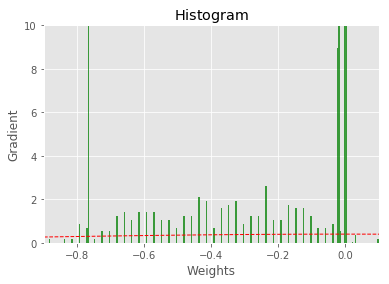

<Figure size 432x288 with 0 Axes>

In [116]:
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Weights')
plt.ylabel('Gradient')
plt.title(r'$\mathrm{Histogram}$')
plt.axis([-0.9, 0.1, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

In [ ]:
model2 = Sequential()
model2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model2.compile(optimizer=sgd,loss='mean_squared_error')
history2 = model2.fit(X_train_scaled, 
                      y_train, epochs=250, 
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val),
                      callbacks=[TestCallback((X_test_scaled.values, yTest))])
#history2=pd.read_csv("history2b.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 6s 594us/step - loss: 1.3981 - val_loss: 1.1174

Testing loss: 1.0213046483710793
Epoch 2/250
9745/9745 [==============================] - 5s 463us/step - loss: 0.6079 - val_loss: 0.7701

Testing loss: 1.0680099724133483
Epoch 3/250
9745/9745 [==============================] - 4s 452us/step - loss: 0.5140 - val_loss: 1.2703

Testing loss: 0.5319029072732968
Epoch 4/250
9745/9745 [==============================] - 4s 438us/step - loss: 0.4367 - val_loss: 1.4253

Testing loss: 0.42704916593477676
Epoch 5/250
9745/9745 [==============================] - 4s 438us/step - loss: 0.3747 - val_loss: 0.7951

Testing loss: 0.6872603961151548
Epoch 6/250
9745/9745 [==============================] - 4s 430us/step - loss: 0.3240 - val_loss: 0.8578

Testing loss: 0.6725279192822753
Epoch 7/250
9745/9745 [==============================] - 4s 422us/step - loss: 0.2902 - val_loss: 1.1685

Testing los

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


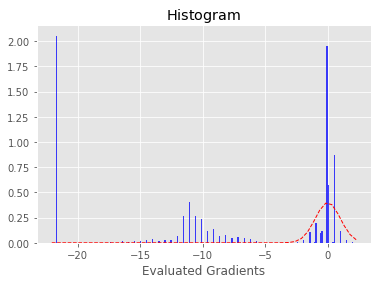

<Figure size 432x288 with 0 Axes>

In [128]:
#history2=pd.read_csv("history2b.csv")
loss = keras.losses.mean_squared_error(model2.output,y_train_scaled)
listOfVariableTensors = model2.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients2 = sess.run(gradients,feed_dict={model2.input:X_train_scaled.values})
evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradients2, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.9, 0.1, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

In [8]:
modelc = Sequential()
modelc.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc.compile(optimizer=sgd,loss='mean_squared_error')
#historyc = model2.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#result= pd.DataFrame(historyc.history)
#result.to_csv("history2c.csv")

In [9]:
modelc2 = Sequential()
modelc2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc2.compile(optimizer=sgd,loss='mean_squared_error')
historyc=pd.read_csv("history2c.csv")

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


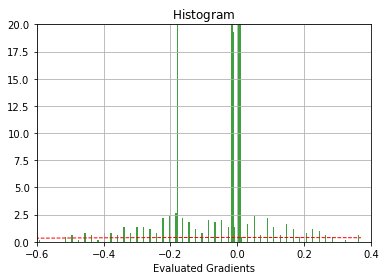

<Figure size 432x288 with 0 Axes>

In [23]:
loss = keras.losses.mean_squared_error(modelc.output,y_train_scaled)
listOfVariableTensors = modelc.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
plt.axis([-0.6, 0.4, 0, 20])
plt.grid(True)
plt.show()
plt.clf()

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


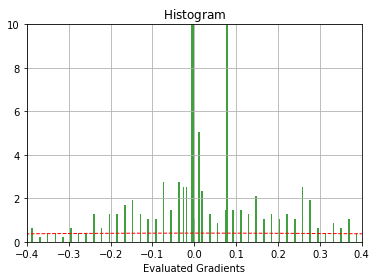

<Figure size 432x288 with 0 Axes>

In [22]:
loss = keras.losses.mean_squared_error(modelc2.output,y_train_scaled)
listOfVariableTensors = modelc2.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientss = sess.run(gradients,feed_dict={modelc2.input:X_train_scaled.values})
evaluated_gradientss = [gradient/len(y_train) for gradient in evaluated_gradientss]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientss, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
plt.axis([-0.4, 0.4, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

>d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.


In [135]:
modeld = Sequential()
modeld.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modeld.compile(optimizer=sgd,loss='mean_squared_error')
historyd = modeld.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resultd= pd.DataFrame(historyd.history)
resultd.to_csv("history2d.csv")

loss = keras.losses.mean_squared_error(modeld.output,y_train_scaled)
listOfVariableTensors = modeld.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientsd = sess.run(gradients,feed_dict={modeld.input:X_train_scaled.values})
evaluated_gradientsd = [gradient/len(y_train) for gradient in evaluated_gradientsd]


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 9s 878us/step - loss: 14.9281 - val_loss: 13.8282
Epoch 2/250
9745/9745 [==============================] - 7s 750us/step - loss: 6.7519 - val_loss: 2.2967
Epoch 3/250
9745/9745 [==============================] - 7s 742us/step - loss: 2.1486 - val_loss: 1.4162
Epoch 4/250
9745/9745 [==============================] - 7s 750us/step - loss: 1.2964 - val_loss: 1.6880
Epoch 5/250
9745/9745 [==============================] - 7s 756us/step - loss: 1.0518 - val_loss: 4.5584
Epoch 6/250
9745/9745 [==============================] - 7s 740us/step - loss: 0.9103 - val_loss: 0.6060
Epoch 7/250
9745/9745 [==============================] - 7s 731us/step - loss: 0.7514 - val_loss: 0.6716
Epoch 8/250
9745/9745 [==============================] - 7s 720us/step - loss: 0.7099 - val_loss: 0.9440
Epoch 9/250
9745/9745 [==============================] - 7s 765us/step - loss: 0.5713 - val_loss: 0.8302
Epoch

9745/9745 [==============================] - 10s 1ms/step - loss: 0.0533 - val_loss: 0.6487
Epoch 78/250
9745/9745 [==============================] - 9s 956us/step - loss: 0.0512 - val_loss: 0.5380
Epoch 79/250
9745/9745 [==============================] - 8s 870us/step - loss: 0.0469 - val_loss: 0.8048
Epoch 80/250
9745/9745 [==============================] - 7s 742us/step - loss: 0.0519 - val_loss: 0.3476
Epoch 81/250
9745/9745 [==============================] - 7s 725us/step - loss: 0.0550 - val_loss: 0.7506
Epoch 82/250
9745/9745 [==============================] - 6s 658us/step - loss: 0.0450 - val_loss: 0.5468
Epoch 83/250
9745/9745 [==============================] - 7s 718us/step - loss: 0.0456 - val_loss: 0.5941
Epoch 84/250
9745/9745 [==============================] - 8s 863us/step - loss: 0.0433 - val_loss: 0.6253
Epoch 85/250
9745/9745 [==============================] - 7s 758us/step - loss: 0.0519 - val_loss: 0.4212
Epoch 86/250
9745/9745 [==============================] - 9s

9745/9745 [==============================] - 7s 718us/step - loss: 0.0287 - val_loss: 0.6201
Epoch 154/250
9745/9745 [==============================] - 6s 605us/step - loss: 0.0285 - val_loss: 0.7060
Epoch 155/250
9745/9745 [==============================] - 6s 664us/step - loss: 0.0291 - val_loss: 0.4799
Epoch 156/250
9745/9745 [==============================] - 7s 678us/step - loss: 0.0271 - val_loss: 0.4840
Epoch 157/250
9745/9745 [==============================] - 6s 633us/step - loss: 0.0286 - val_loss: 0.5323
Epoch 158/250
9745/9745 [==============================] - 6s 599us/step - loss: 0.0261 - val_loss: 0.1698
Epoch 159/250
9745/9745 [==============================] - 6s 642us/step - loss: 0.0301 - val_loss: 0.6212
Epoch 160/250
9745/9745 [==============================] - 6s 604us/step - loss: 0.0300 - val_loss: 0.3687
Epoch 161/250
9745/9745 [==============================] - 6s 615us/step - loss: 0.0312 - val_loss: 0.5639
Epoch 162/250
9745/9745 [==========================

9745/9745 [==============================] - 6s 649us/step - loss: 0.0219 - val_loss: 0.4926
Epoch 230/250
9745/9745 [==============================] - 6s 639us/step - loss: 0.0208 - val_loss: 0.5170
Epoch 231/250
9745/9745 [==============================] - 7s 678us/step - loss: 0.0202 - val_loss: 0.5930
Epoch 232/250
9745/9745 [==============================] - 7s 689us/step - loss: 0.0207 - val_loss: 0.5910
Epoch 233/250
9745/9745 [==============================] - 6s 660us/step - loss: 0.0230 - val_loss: 0.6330
Epoch 234/250
9745/9745 [==============================] - 7s 670us/step - loss: 0.0207 - val_loss: 0.4627
Epoch 235/250
9745/9745 [==============================] - 8s 792us/step - loss: 0.0216 - val_loss: 0.5004
Epoch 236/250
9745/9745 [==============================] - 9s 892us/step - loss: 0.0250 - val_loss: 0.6280
Epoch 237/250
9745/9745 [==============================] - 9s 885us/step - loss: 0.0198 - val_loss: 0.6629
Epoch 238/250
9745/9745 [==========================

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


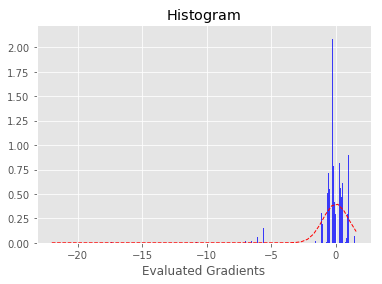

<Figure size 432x288 with 0 Axes>

In [139]:
import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientsd, 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/portilla/.conda/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


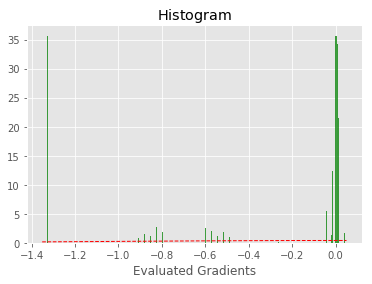

<Figure size 432x288 with 0 Axes>

In [138]:
modeldo = Sequential()
modeldo.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeldo.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modeld.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(modeldo.output,y_train_scaled)
listOfVariableTensors = modeldo.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradientsdo = sess.run(gradients,feed_dict={modeldo.input:X_train_scaled.values})
evaluated_gradientsdo = [gradient/len(y_train) for gradient in evaluated_gradientsdo]

import matplotlib.mlab as mlab
mu, sigma = 0, 1
# the histogram of the data
n, bins, patches = plt.hist(evaluated_gradientsdo, 50, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Evaluated Gradients')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram}$')
#plt.axis([-0.1, 0.7, 0, 10])
plt.grid(True)
plt.show()
plt.clf()

> e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.
```python
...
model.add(Dense(nh, kernel_initializer='uniform',activation='relu')) #uniform
...
or
...
model.add(Dense(nh, kernel_initializer='he_uniform',activation='relu')) #he
...
```

In [18]:
modele = Sequential()
modele.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu')) #uniform
modele.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.001)
modele.compile(optimizer=sgd,loss='mean_squared_error')
historye = modele.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2e(uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 7s 749us/step - loss: 27.4344 - val_loss: 2.8600
Epoch 2/250
9745/9745 [==============================] - 6s 589us/step - loss: 0.9867 - val_loss: 1.1283
Epoch 3/250
9745/9745 [==============================] - 6s 610us/step - loss: 0.5372 - val_loss: 1.5091
Epoch 4/250
9745/9745 [==============================] - 7s 708us/step - loss: 0.4210 - val_loss: 1.1276
Epoch 5/250
9745/9745 [==============================] - 6s 634us/step - loss: 0.3344 - val_loss: 0.7306
Epoch 6/250
9745/9745 [==============================] - 7s 671us/step - loss: 0.2691 - val_loss: 0.8697
Epoch 7/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.2534 - val_loss: 0.8071
Epoch 8/250
9745/9745 [==============================] - 6s 643us/step - loss: 0.2207 - val_loss: 0.6698
Epoch 9/250
9745/9745 [==============================] - 7s 747us/step - loss: 0.1865 - val_loss: 0.6007
Epoch 

Epoch 78/250
9745/9745 [==============================] - 7s 711us/step - loss: 0.0413 - val_loss: 0.2902
Epoch 79/250
9745/9745 [==============================] - 7s 738us/step - loss: 0.0421 - val_loss: 0.2978
Epoch 80/250
9745/9745 [==============================] - 6s 654us/step - loss: 0.0385 - val_loss: 0.2980
Epoch 81/250
9745/9745 [==============================] - 5s 508us/step - loss: 0.0478 - val_loss: 0.3138
Epoch 82/250
9745/9745 [==============================] - 6s 642us/step - loss: 0.0373 - val_loss: 0.3032
Epoch 83/250
9745/9745 [==============================] - 7s 734us/step - loss: 0.0355 - val_loss: 0.3118
Epoch 84/250
9745/9745 [==============================] - 8s 805us/step - loss: 0.0383 - val_loss: 0.3205
Epoch 85/250
9745/9745 [==============================] - 7s 739us/step - loss: 0.0370 - val_loss: 0.3064
Epoch 86/250
9745/9745 [==============================] - 9s 951us/step - loss: 0.0382 - val_loss: 0.2913
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 8s 805us/step - loss: 0.0241 - val_loss: 0.2928
Epoch 156/250
9745/9745 [==============================] - 9s 890us/step - loss: 0.0217 - val_loss: 0.2834
Epoch 157/250
9745/9745 [==============================] - 9s 926us/step - loss: 0.0248 - val_loss: 0.2714
Epoch 158/250
9745/9745 [==============================] - 9s 918us/step - loss: 0.0246 - val_loss: 0.2818
Epoch 159/250
9745/9745 [==============================] - 9s 971us/step - loss: 0.0245 - val_loss: 0.2760
Epoch 160/250
9745/9745 [==============================] - 9s 971us/step - loss: 0.0236 - val_loss: 0.2881
Epoch 161/250
9745/9745 [==============================] - 7s 706us/step - loss: 0.0238 - val_loss: 0.2845
Epoch 162/250
9745/9745 [==============================] - 6s 645us/step - loss: 0.0237 - val_loss: 0.2957
Epoch 163/250
9745/9745 [==============================] - 6s 637us/step - loss: 0.0267 - val_loss: 0.2867
Epoch 164/250
9745/9745 [============

In [25]:
modelhe = Sequential()
modelhe.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu')) #uniform
modelhe.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00008)
modelhe.compile(optimizer=sgd,loss='mean_squared_error')
historye = modelhe.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2he(he-uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 18s 2ms/step - loss: 15.9934 - val_loss: 4.1458
Epoch 2/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.8212 - val_loss: 3.2474
Epoch 3/250
9745/9745 [==============================] - 21s 2ms/step - loss: 1.0384 - val_loss: 2.2443
Epoch 4/250
9745/9745 [==============================] - 22s 2ms/step - loss: 0.6994 - val_loss: 2.0361
Epoch 5/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.5443 - val_loss: 1.9875
Epoch 6/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.4534 - val_loss: 1.7690
Epoch 7/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.3952 - val_loss: 1.6390
Epoch 8/250
9745/9745 [==============================] - 15s 2ms/step - loss: 0.3391 - val_loss: 1.6707
Epoch 9/250
9745/9745 [==============================] - 19s 2ms/step - loss: 0.3057 - val_loss: 1.5853
Epoch 10/250
97

9745/9745 [==============================] - 5s 509us/step - loss: 0.0326 - val_loss: 0.5384
Epoch 156/250
9745/9745 [==============================] - 5s 530us/step - loss: 0.0330 - val_loss: 0.5520
Epoch 157/250
9745/9745 [==============================] - 6s 584us/step - loss: 0.0336 - val_loss: 0.5173
Epoch 158/250
9745/9745 [==============================] - 5s 523us/step - loss: 0.0334 - val_loss: 0.5173
Epoch 159/250
9745/9745 [==============================] - 5s 527us/step - loss: 0.0322 - val_loss: 0.5260
Epoch 160/250
9745/9745 [==============================] - 5s 529us/step - loss: 0.0320 - val_loss: 0.5238
Epoch 161/250
9745/9745 [==============================] - 5s 498us/step - loss: 0.0321 - val_loss: 0.5078
Epoch 162/250
9745/9745 [==============================] - 5s 491us/step - loss: 0.0321 - val_loss: 0.5589
Epoch 163/250
9745/9745 [==============================] - 6s 573us/step - loss: 0.0319 - val_loss: 0.5220
Epoch 164/250
9745/9745 [==========================

**>f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.**

In [63]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
historyf = modelf.fit(X_train_scaled,
                      y_train, epochs=250,
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val))

resultf= pd.DataFrame(historyf.history)
resultf.to_csv("history2f.csv")
numEpochs = 250
test_loss[-1] = modelf.evaluate(X_test_scaled, yTest, verbose=0)
train_loss=historyf.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(10, 6))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 18s 2ms/step - loss: 10.1803 - val_loss: 2.0508
Epoch 2/250
9745/9745 [==============================] - 15s 2ms/step - loss: 2.5345 - val_loss: 1.5179
Epoch 3/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.4274 - val_loss: 5.7192
Epoch 4/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.0272 - val_loss: 0.7788
Epoch 5/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.8274 - val_loss: 0.9646
Epoch 6/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.6861 - val_loss: 0.8756
Epoch 7/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.5210 - val_loss: 1.1036
Epoch 8/250
9745/9745 [==============================] - 15s 2ms/step - loss: 0.4704 - val_loss: 2.7827
Epoch 9/250
9745/9745 [==============================] - 16s 2ms/step - loss: 0.4209 - val_loss: 1.7655
Epoch 10/250
97

9745/9745 [==============================] - 6s 597us/step - loss: 0.0317 - val_loss: 0.3936
Epoch 156/250
9745/9745 [==============================] - 7s 704us/step - loss: 0.0253 - val_loss: 0.6136
Epoch 157/250
9745/9745 [==============================] - 6s 638us/step - loss: 0.0295 - val_loss: 0.5685
Epoch 158/250
9745/9745 [==============================] - 7s 722us/step - loss: 0.0270 - val_loss: 0.4987
Epoch 159/250
9745/9745 [==============================] - 7s 669us/step - loss: 0.0291 - val_loss: 0.6013
Epoch 160/250
9745/9745 [==============================] - 8s 788us/step - loss: 0.0288 - val_loss: 0.4700
Epoch 161/250
9745/9745 [==============================] - 6s 648us/step - loss: 0.0283 - val_loss: 0.4105
Epoch 162/250
9745/9745 [==============================] - 6s 667us/step - loss: 0.0267 - val_loss: 0.7365
Epoch 163/250
9745/9745 [==============================] - 6s 601us/step - loss: 0.0274 - val_loss: 0.6919
Epoch 164/250
9745/9745 [==========================

NameError: name 'historyd' is not defined

> **g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**'**y que es continua derivable (**softplus**)**¿Cuál es el beneficio de ésta con respecto ReLU? Comente.**

Las dos funciones de activación son muy similares, excepto que Softplus es diferenciable es cero. Por otra parte, RElu hace más fáciles los cálculos y su derivada, por lo que los algoritmos forward pass y backward pass son más rápidos. Con la función de activación Relu se favorecen las representaciones distribuidas, por su arquitectura no es derivable en cero, la derivada no es continua. La dura saturación de Relu en el umbral podría bloquear el gradiente en la capa de salida, al tener ceros reales, ya que no pueden recuperarse de esto. Sin embargo, no sucede tan frecuentemente que la suma ponderada sea cero, para esto se puede normalizar la data entre 0 y 1. En casos donde no se tengan estas garantías es mejor usar la versión diferenciable Softplus, que además hace el entrenamiento es más sencillo.


In [66]:
modelg = Sequential()
modelg.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus')) #uniform
modelg.add(Dense(256,  kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelg.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00001)
modelg.compile(optimizer=sgd,loss='mean_squared_error')
historyg = modelg.fit(X_train_scaled, y_train, epochs=250, 
                      verbose=1, 
                      validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 10s 1ms/step - loss: 16.0616 - val_loss: 8.6825
Epoch 2/250
9745/9745 [==============================] - 10s 1ms/step - loss: 5.7890 - val_loss: 7.1030
Epoch 3/250
9745/9745 [==============================] - 8s 828us/step - loss: 4.6571 - val_loss: 6.0007
Epoch 4/250
9745/9745 [==============================] - 8s 781us/step - loss: 3.9643 - val_loss: 5.2332
Epoch 5/250
9745/9745 [==============================] - 8s 828us/step - loss: 3.4598 - val_loss: 4.6992
Epoch 6/250
9745/9745 [==============================] - 8s 789us/step - loss: 3.0641 - val_loss: 4.2025
Epoch 7/250
9745/9745 [==============================] - 6s 646us/step - loss: 2.7297 - val_loss: 3.8254
Epoch 8/250
9745/9745 [==============================] - 7s 724us/step - loss: 2.4487 - val_loss: 3.4220
Epoch 9/250
9745/9745 [==============================] - 7s 761us/step - loss: 2.2064 - val_loss: 3.1768
Epoch 10

Epoch 78/250
9745/9745 [==============================] - 7s 739us/step - loss: 0.3276 - val_loss: 1.2370
Epoch 79/250
9745/9745 [==============================] - 8s 774us/step - loss: 0.3254 - val_loss: 1.2381
Epoch 80/250
9745/9745 [==============================] - 7s 758us/step - loss: 0.3231 - val_loss: 1.2668
Epoch 81/250
9745/9745 [==============================] - 7s 725us/step - loss: 0.3206 - val_loss: 1.2770
Epoch 82/250
9745/9745 [==============================] - 7s 739us/step - loss: 0.3184 - val_loss: 1.2878
Epoch 83/250
9745/9745 [==============================] - 7s 744us/step - loss: 0.3161 - val_loss: 1.2150
Epoch 84/250
9745/9745 [==============================] - 7s 726us/step - loss: 0.3141 - val_loss: 1.2763
Epoch 85/250
9745/9745 [==============================] - 7s 693us/step - loss: 0.3114 - val_loss: 1.2756
Epoch 86/250
9745/9745 [==============================] - 8s 778us/step - loss: 0.3096 - val_loss: 1.3462
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 9s 882us/step - loss: 0.2187 - val_loss: 1.1667
Epoch 156/250
9745/9745 [==============================] - 8s 842us/step - loss: 0.2179 - val_loss: 1.1592
Epoch 157/250
9745/9745 [==============================] - 8s 785us/step - loss: 0.2172 - val_loss: 1.1677
Epoch 158/250
9745/9745 [==============================] - 8s 862us/step - loss: 0.2162 - val_loss: 1.1438
Epoch 159/250
9745/9745 [==============================] - 8s 863us/step - loss: 0.2155 - val_loss: 1.1664
Epoch 160/250
9745/9745 [==============================] - 8s 868us/step - loss: 0.2148 - val_loss: 1.1375
Epoch 161/250
9745/9745 [==============================] - 8s 845us/step - loss: 0.2138 - val_loss: 1.1279
Epoch 162/250
9745/9745 [==============================] - 7s 713us/step - loss: 0.2130 - val_loss: 1.1662
Epoch 163/250
9745/9745 [==============================] - 9s 905us/step - loss: 0.2122 - val_loss: 1.2174
Epoch 164/250
9745/9745 [============

h) Pruebe con utilizar una red shallow (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?

In [67]:
numEpochs = 250
test_loss = np.zeros(numEpochs)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss = self.model.evaluate(x, y, verbose=0)
        test_loss[epoch-1] = loss
        print('\nTesting loss: {}'.format(loss))

In [68]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd,loss='mean_squared_error')
historyh = model.fit(X_train_scaled.values,
                     y_train_scaled, epochs=250, 
                     verbose=1, 
                     validation_data=(X_val_scaled.values, y_val_scaled),
                     callbacks=[TestCallback((X_test_scaled.values, yTest))])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 802us/step - loss: 0.1296 - val_loss: 0.0751

Testing loss: 116.09199572763924
Epoch 2/250
9745/9745 [==============================] - 9s 886us/step - loss: 0.0727 - val_loss: 0.0653

Testing loss: 118.33883508581287
Epoch 3/250
9745/9745 [==============================] - 9s 883us/step - loss: 0.0620 - val_loss: 0.0547

Testing loss: 117.31697167047086
Epoch 4/250
9745/9745 [==============================] - 8s 810us/step - loss: 0.0560 - val_loss: 0.0491

Testing loss: 116.37066476326474
Epoch 5/250
9745/9745 [==============================] - 10s 987us/step - loss: 0.0525 - val_loss: 0.0475

Testing loss: 116.00664916290921
Epoch 6/250
9745/9745 [==============================] - 7s 723us/step - loss: 0.0498 - val_loss: 0.0475

Testing loss: 116.4163169062524
Epoch 7/250
9745/9745 [==============================] - 6s 643us/step - loss: 0.0475 - val_loss: 0.0462

Testing loss

9745/9745 [==============================] - 7s 726us/step - loss: 0.0148 - val_loss: 0.0219

Testing loss: 116.3290523799854
Epoch 118/250
9745/9745 [==============================] - 8s 787us/step - loss: 0.0147 - val_loss: 0.0244

Testing loss: 115.54656230439697
Epoch 119/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0146 - val_loss: 0.0204

Testing loss: 116.47550310049577
Epoch 120/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0146 - val_loss: 0.0233

Testing loss: 116.06921471872435
Epoch 121/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0144 - val_loss: 0.0236

Testing loss: 115.86526118588829
Epoch 122/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.0144 - val_loss: 0.0202

Testing loss: 116.57715404136385
Epoch 123/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0143 - val_loss: 0.0221

Testing loss: 116.01581017795918
Epoch 124/250
9745/9745 [========

9745/9745 [==============================] - 12s 1ms/step - loss: 0.0079 - val_loss: 0.0204

Testing loss: 116.6047821984117
Epoch 234/250
9745/9745 [==============================] - 10s 997us/step - loss: 0.0078 - val_loss: 0.0198

Testing loss: 116.5870820907574
Epoch 235/250
9745/9745 [==============================] - 8s 813us/step - loss: 0.0078 - val_loss: 0.0207

Testing loss: 116.3749682990361
Epoch 236/250
9745/9745 [==============================] - 8s 785us/step - loss: 0.0078 - val_loss: 0.0202

Testing loss: 116.4347351725394
Epoch 237/250
9745/9745 [==============================] - 8s 834us/step - loss: 0.0077 - val_loss: 0.0210

Testing loss: 116.5001489500751
Epoch 238/250
9745/9745 [==============================] - 9s 877us/step - loss: 0.0077 - val_loss: 0.0213

Testing loss: 116.6932070813905
Epoch 239/250
9745/9745 [==============================] - 9s 882us/step - loss: 0.0077 - val_loss: 0.0212

Testing loss: 116.30333716291162
Epoch 240/250
9745/9745 [========

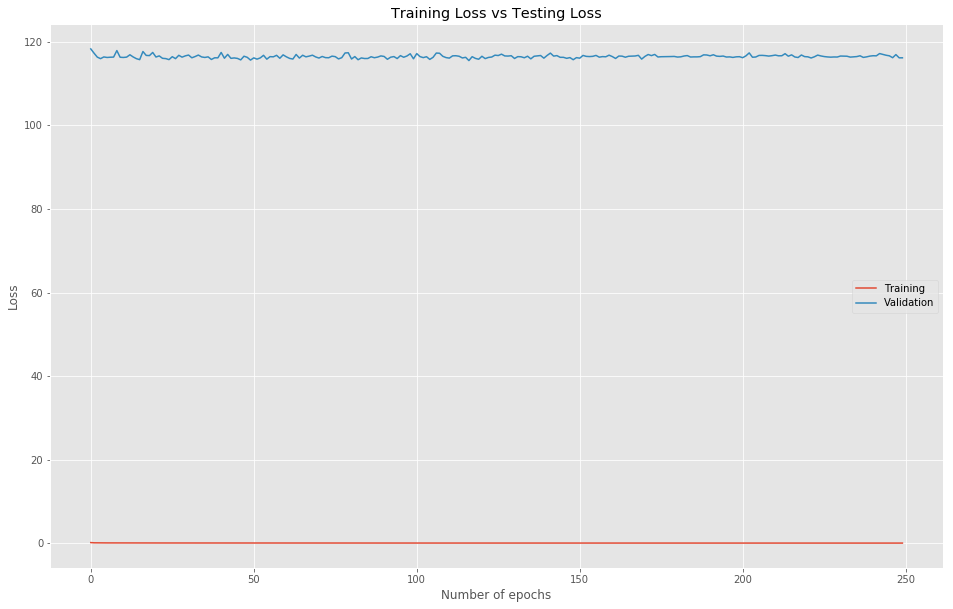

In [70]:
test_loss[-1] = model.evaluate(X_test_scaled.values, yTest, verbose=0)
train_loss=historyh.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])